In [87]:
import numpy as np
from matplotlib import pyplot as plt

styles = {
    "A": {"prob": 0.2, "total_rewards":0, "total_attempts":0, "iteration": [], "attempts": []},
    "B": {"prob": 0.3, "total_rewards":0, "total_attempts":0, "iteration": [], "attempts": []},
    "C": {"prob": 0.2, "total_rewards":0, "total_attempts":0, "iteration": [], "attempts": []}
}

def get_average_rewards(styles):
    rewards = {}
    for k, v in styles.items():
        rewards[k] = v["total_rewards"] / v["total_attempts"] if v["total_attempts"] > 0 else 0
    return rewards




In [88]:
def select_style(epsilon, styles):
  #Numero aleatorio, si es menor a epsilon se toma una accion aleatoria, si no se toma la accion con mayor recompensa promedio.
  result = np.random.uniform()
  #Aca el componente aleatorio de explotacion vs exploracion
  if result < epsilon:

    return list(styles.keys())[np.random.randint(0, len(styles))-1] 
  else:
    #Si todo es 0 deberia seleccionar una accion aleatoria
    average_rewards = get_average_rewards(styles)
    if np.sum(average_rewards.values()) == 0:
      return np.random.randint(0, len(styles))
    #Tengo que seleccionar el mejor estilo (La accion con mejor recompensa promedio)
    max_style = list(styles.keys())[0]
    for k, v in average_rewards.items():
      if v > average_rewards[max_style]:
        max_style = k
    return max_style


In [89]:
def mab_test(styles, num_iterations, epsilon):
  for iteration in range(num_iterations+1):
    #select_style = select_action, puede ser random o la mejor puntuada
    style = select_style(epsilon, styles)
    #Como le fue a la mejor puntuada? (actions)
    reward = int(np.random.uniform() <= styles[style]["prob"])
    
    styles[style]["total_rewards"]  += reward
    styles[style]["total_attempts"] += 1
    styles[style]["iteration"].append(iteration)
    styles[style]["attempts"].append(styles[style]["total_attempts"])

    if iteration % 1000 == 0:
      print("------Recompensa por estilos-------")
      for k, v in styles.items():
        print('Estilo {}: Recompensa total {}, Intentos {}, Recompensa promedio {:.2f}'
              .format(k, v["total_rewards"], v["total_attempts"],
                      v["total_rewards"] / v["total_attempts"] if v["total_attempts"] > 0 else 0))
      print("-----------------------------------")
      
  # Print results
  #best_bandit = np.argmax(average_rewards)
  #print('\nEl mejor estilo es {} con una recompensa promedio de  {:.4f}'
  #      .format(best_bandit, average_rewards[best_bandit]))
  #print('En {} episodios las recompensas fueron {}'
  #      .format(num_iterations, sum(total_rewards)))
mab_test(styles=styles, num_iterations=500, epsilon=0.1)

------Recompensa por estilos-------
Estilo A: Recompensa total 0, Intentos 1, Recompensa promedio 0.00
Estilo B: Recompensa total 0, Intentos 0, Recompensa promedio 0.00
Estilo C: Recompensa total 0, Intentos 0, Recompensa promedio 0.00
-----------------------------------


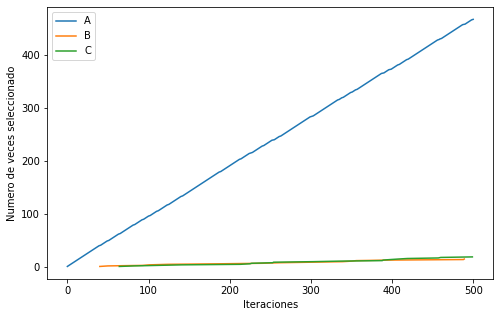

In [90]:

plt.figure(figsize=(8,5))
for k, v in styles.items():
  plt.plot(v["iteration"], v["attempts"], label=k)

plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Numero de veces seleccionado")
plt.show()
